In [14]:
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy, pylab

<IPython.core.display.Javascript object>


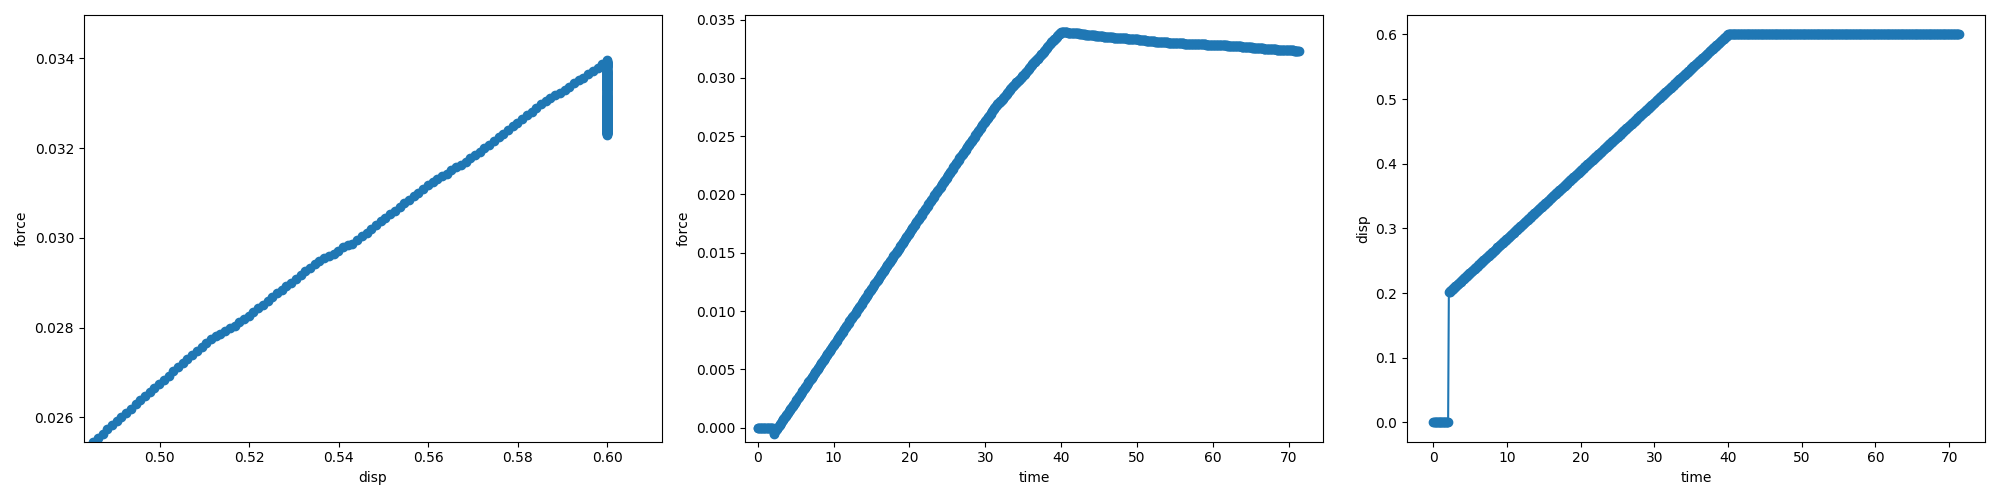

In [15]:


pylab.figure(figsize=(20,5))

dat = numpy.loadtxt("output/thermo.dat",skiprows=1)
pylab.subplot(1,3,1)
pylab.xlabel("disp")
pylab.ylabel("force")
pylab.plot(dat[:,8]/8,dat[:,7]/8,marker='o')

pylab.subplot(1,3,2)
pylab.xlabel("time")
pylab.ylabel("force")
pylab.plot(dat[:,0],dat[:,7]/8,marker='o')

pylab.subplot(1,3,3)
pylab.xlabel("time")
pylab.ylabel("disp")
pylab.plot(dat[:,0],dat[:,8]/8,marker='o')

pylab.tight_layout()
pylab.savefig("output/thermo.png")
pylab.show()

<IPython.core.display.Javascript object>


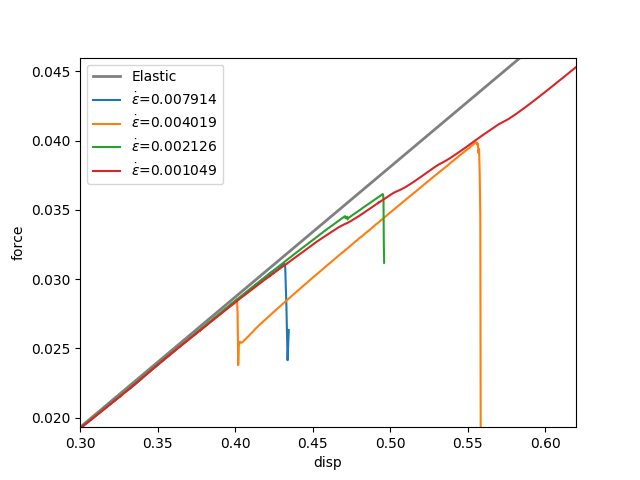

0.007913505747126438
0.004019220430107528
0.0021261606189967985
0.0010491948771719592


In [39]:
pylab.plot([0.012,0.6],[-0.0078,0.0475],color='gray',linewidth=2,label="Elastic")
for file in ["output.old.20200220140304","output.old.20200220143456","output.old.20200220151819","output.old.20200221093225"]:
    dat = numpy.loadtxt("{}/thermo.dat".format(file),skiprows=1)
    pylab.xlabel("disp")
    pylab.ylabel("force")
    dt = dat[-1,0]-dat[40,0]
    ddisp = (dat[-1,8]-dat[40,8])/8
    print(ddisp/dt)
    pylab.plot(dat[:,8]/8,dat[:,7]/8,label=r"$\dot\varepsilon$={0:.6f}".format(ddisp/dt))
pylab.legend()
pylab.xlim(0.3,0.62)
pylab.ylim(0.0193,0.046)
pylab.savefig('stressstrain.pdf')
pylab.show()

output/00020cell/


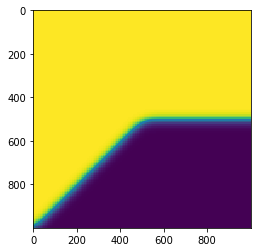

In [13]:
import pylab
import yt
yt.funcs.mylog.setLevel(0)
from skimage import measure
import cv2
#ds = yt.load("/home/brunnels/Research/Papers/2019_09_25_PFGBA/results/output_inclusion_abssin/beta1e-4/721000cell/")
for f in ["output/00020cell/"]:
    print(f)
    ds = yt.load(f)
    #plt = yt.SlicePlot(ds,'z','Eta001')
    #plt.set_log('Eta001',False)
    #plt.show()
    
    slice = ds.slice('z',0.0)
    width = 2
    resolution = 1000
    Eta = slice.to_frb(width,resolution)['Eta001']
    pylab.imshow(Eta)
    contours = measure.find_contours(cv2.blur(Eta,(10,10)),0.5)
    for contour in contours:
        pylab.plot(contour[:,1],contour[:,0])
    
pylab.show()

#